## CS 559 Homework 4

### Nan Chen

### SID: 20018997

### Email: nchen15@stevens.edu

### 1 Neural Network Backward Propagation [50 pts]
Consider neural networks with one hidden layer, as discussed during the lecture. The forward
propagation prediction was implemented. Complete the backward propagation codes. Using the
generated data, predict y.
```
x, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
```

### Forward Propagation
* The linaer combination from the input layer: $ A=\sum W_1X $
* The nonlinear activation function: $\sigma(A)=\frac{1}{1+e^{-A}}$
* The hidden layer output $Z$: $Z=\sigma(A)$
* The output layer output $\hat{Y}$: $\hat{Y} = \sigma(W_2 Z)$
* The error function: $E=\frac{1}{2}\sum (\hat{Y}-Y)^2$

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

w1 = np.random.rand(50,5)
w2 = np.random.rand(1,50)

def ffNN(w,x):
    a = w.dot(x.T)
    return a

def sigmoid(x):
    return 1/(1+np.exp(-x))

def _delta(y,ypred):
    return ypred-y

def _cost(y,ypred):
    cost = np.sum(_delta(y,ypred)**2)/(2*len(y))
    return cost

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

## input layer to hidden layer
a1 = ffNN(w1, x)
z1 = sigmoid(a1)
print(f'shape of a1: {a1.shape}, z1: {z1.shape}')

## hidden layer to output layer
a2 = ffNN(w2, z1.T)
yhat = sigmoid(a2)
print(f'shape of y1: {yhat.shape}')
print(f'cost: {_cost(y,yhat)}')

shape of a1: (50, 100), z1: (50, 100)
shape of y1: (1, 100)
cost: 9762.26950384947


### Error Backpropagation: Output layer to hidden layer
a. (15 pts) 
* The error on output layer: $\delta_2 = \hat{Y}-Y$ where $\hat{Y}$ is the predicted value. 
* The dradient of Error: $\nabla E = \frac{\partial E}{\partial W_2} = \sum\delta_2 Z$
* The update $W_2$ value: $\hat{W}_2 = W_2 + \Delta W_2 = W_2 - \eta\nabla E$
* Compute $\delta_2$ and $\frac{\partial E}{\partial W_2}$ . Then, update $W_2$. 
* Use the learning rate $\eta = 1*10^{-4}$

In [107]:
delta2 = _delta(y, yhat)
dE_dW2 = delta2.dot(z1.T)

eta = 0.0001
delta_w2 = eta * dE_dW2
w2_new = w2 - delta_w2

### Error Backpropagation: Hidden layer to input layer
b. (15 pts)
* The error on the hidden layer: $\delta_1 = \sigma'(A)\sum\delta_2 W_2$ where $\sigma'(A) = Z[1-Z]$.
* The update of $W_1$: $\hat{W}_1 = W_1 + \Delta W_1 = W_1 - \eta\delta_1 X$ 
* Compute $\delta_1$ and $\frac{\partial E}{\partial W_1}$ . Then, update $W_1$. 
* Use the learning rate $\eta = 1*10^{-4}$

In [108]:
dz1 = z1 * (1 - z1)
delta1 = dz1.T * (delta2.T.dot(w2))

delta_w1 = delta1.T.dot(x)
w1_new = w1 - eta * delta_w1

## Predict with new forward propagation
a1_new = ffNN(w1_new, x)
z1_new = sigmoid(a1_new)

## hidden layer to output layer
a2_new = ffNN(w2_new, z1_new.T)
yhat_new = sigmoid(a2_new)

### Prediction with updated $W_1$ and $W_2$:

### Put all together
c. (15 pts)
* Put the forward and backward propagation codes together in a for-loop to observe the error convergence.

9737.655401411634


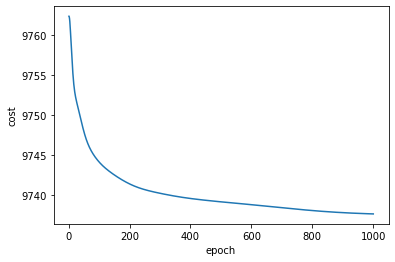

In [109]:
def fBNN(x,y,w1,w2,eta,epoch):
    cost_list = []
    epoch_list = []
    ypred_list = []
    for i in range(1,epoch+1):
        """
        forward propagation
        """
        a1 = ffNN(w1, x)
        z1 = sigmoid(a1)

        a2 = ffNN(w2, z1.T)
        yhat = sigmoid(a2)
        """
        backpropagation from the output layer to the hidden layer
        """
        delta2 = _delta(y, yhat)
        dE_dW2 = delta2.dot(z1.T)
        delta_w2 = eta * dE_dW2
        w2 -= delta_w2
        """
        backpropagation from the hidden layer to the input layer
        """        
        dz1 = z1 * (1 - z1)
        delta1 = dz1.T * (delta2.T.dot(w2))
        
        delta_w1 = delta1.T.dot(x)
        w1 -= eta * delta_w1
        """
        forward propagation with new weights
        """
        a1_new = ffNN(w1, x)
        z1_new = sigmoid(a1_new)

        a2_new = ffNN(w2, z1_new.T)
        yhat_new = sigmoid(a2_new)
        
        cost_new = _cost(y, yhat_new)
        
        if i>=1 and cost_new >=5E-3:
            epoch_list.append(i)
            cost_list.append(cost_new)
            ypred_list.append(yhat_new)
        if i > 1 and cost_new <= 5E-3:
            print("last epoch:",i,"cost:",cost,"y_pred:",yhat_new)
            break
    print(cost_new)      
    plt.plot(epoch_list, cost_list)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()

fBNN( x= x, y = y, w1 = w1, w2 = w2, eta = 0.0001, epoch =1000)

d. (5 pts)
* Use Scikit-learn Neural Network to predict the target variable.

In [110]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cost = _cost(y_test, y_pred)

print(f"The cost is: {cost}")

The cost is: 1163.8311354371533


d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
